In [31]:
import pandas as pd
import torch
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


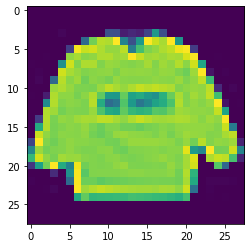

In [3]:
index = 0
image = train_df.drop('label',axis=1).values
plt.imshow(image[index].reshape(28,28))

In [4]:
#init x and y original and place in tensors
Y_train = torch.tensor(train_df.label.values)
X_train_orig = torch.tensor(train_df.drop('label',axis=1).values)
#flatten
X_train_faltten = X_train_orig.reshape((-1,28*28))
#normalize
X_train = X_train_faltten/255.
X_train.shape,Y_train.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [29]:
#model 
import torch.nn as nn
class NeuralNet(torch.nn.Module):
    def __init__(self):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(784,128)
        self.act = nn.ReLU()
        self.l2 = nn.Linear(128,10)
    def forward(self,x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return x

In [ ]:
#training
model = NeuralNet()
batch_size = 128
loss_function = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr=0.001)
losses,accuracies = [],[]
for i in (t := trange(1000)):
    samp = np.random.randint(0,X_train.shape[0],size=(batch_size))
    X = X_train[samp]
    Y = Y_train[samp]
    optim.zero_grad()
    out = model(X)
    cat = torch.argmax(out,dim=1)
    accuracy = (cat == Y).float().mean()
    loss = loss_function(out,Y)
    loss.backward()
    optim.step()
    loss,accuracy = loss.item(),accuracy.item()
    losses.append(loss)
    accuracies.append(accuracy)
    t.set_description('loss %.2f accuracy %.2f' % (loss, accuracy))
    
plt.ylim(-0.1,1.1)
plot(losses)
plot(accuracies)

  0%|          | 0/1000 [00:00<?, ?it/s]